In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cnst
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from jupyterthemes import jtplot
jtplot.style(theme='onedork',ticks=True, grid=False, figsize=(6, 4.5),context='talk', fscale=1.4, spines=False, gridlines='--')
%matplotlib inline
hbar= cnst.hbar
#hbar=1.054571596*10**-34      #reduced Planck's constant,J/s
kB=cnst.Boltzmann
#kB=1.3806503*10**-23        #Boltzmann's constant, J/K
Gamma=2*np.pi*6.065*10**6     #damping rate, Hz
omega0=2*np.pi*384.2304844685*10**12    #resonant frequency,Hz
c=cnst.c
#c=2.99792458*10**8         #speed of light
m=1.44316060*10**-25        #atomic mass of Rb87, kg
Er=2*hbar**2*np.pi**2/m/(1064*10**-9)**2    #recoil energy

eta0=377   # characteristic impedance of vaccun


In [2]:
def Vdip(radial,axial,Power,waist,Lambda):
    #Power: power of the laser beam, W
    #waist: waist of the laser beam, um
    #r: radial axis, um
    #z: axial axis, um
    # Lambda: wavelength of the laser, nm
    
    w0=waist*10**-6
    r=radial*10**-6
    z=axial*10**-6
    lbd=Lambda*10**-9
#Gaussian beam
    zR=np.pi*w0**2/lbd
    wz=w0*np.sqrt(1+(z/zR)**2)
    Irz=2*Power/np.pi/wz**2*np.e**(-2*r**2/wz**2)
#saturated intensity
    
    Isat=hbar*Gamma*omega0**3/12/np.pi/c**2
#for detunings larger than excited states hyperfine splitting, viz ~100 MHz
#V=pi*c**2*Gamma/2/omega0**3*((2+P*gF*mF)/delta2F+(2-P*gF*mF)/delta1F)*I(r)
    delta=2*np.pi*c/lbd-omega0
#for detuning larger than fine structrue ,viz ~10nm. linear polarization
    V=hbar*Gamma**2/8/delta*Irz/Isat/Er


    return V



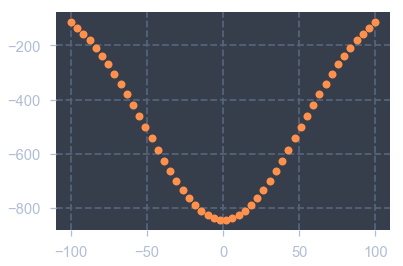

In [3]:
rlist=np.linspace(-100.0,100.0,50)
#zlist=np.linspace(-1000.0,1000.0,200)
Vlistr=Vdip(rlist,0.,10.0,100.0,1064.)
#Vlistz=Vdip(10.,100.,0,zlist,1064.)
#plt.figure(facecolor='w')
plt.grid(True)
plt.plot(rlist,Vlistr,'o',markeredgecolor='r',markerfacecolor='y',
         markersize=8,linewidth=10)
#plt.show()
#plt.plot(zlist,Vlistz)
#Vdip(10,100,0,0,532)


In [4]:
Vdip(0.,0.001,10.,100.,1064.)

-844.1016745010412

In [5]:
def Vlatt(radial,axial,time,theta,Power,waist,Lambda,attenuation,misalign):
  #Power: power of the laser beam, W
    #waist: waist of the laser beam, um
    #r: radial axis, um
    #z: axial axis, um
    # Lambda: wavelength of the laser, nm
    
    w0=waist*10**-6
    r1=radial*10**-6
    r2=(radial+misalign)*10**-6
    z=axial*10**-6
    #z2=axial*10**-6
    lbd=Lambda*10**-9
    k=2*np.pi/lbd*np.cos(theta)
    t=time
    omega=2*np.pi*c/lbd
#Gaussian beam
    zR=np.pi*w0**2/lbd
    wz=w0*np.sqrt(1+(z/zR)**2)
    Rz=z*(1+(zR/z)**2)
    phiz=np.arctan(z/zR)
    #zR=np.pi*w0**2/lbd
    #wz2=w0*np.sqrt(1+(z2/zR)**2)
    #Rz2=z2*(1+(zR/z2)**2)
    #phiz2=np.arctan(z2/zR)
#power and intensity
    I0=2*Power/np.pi/w0**2
    Ef0=np.sqrt(2*eta0*I0)
    Eb0=np.sqrt(2*eta0*attenuation*I0)
#forward beam
    Eforrz=Ef0*w0/wz*np.e**(-r1**2/wz**2)*np.e**(-1j*(k*z+k*r1**2/2/Rz-phiz)+1j*omega*t)
#Backward beam
    Ebackrz=Eb0*w0/wz*np.e**(-r2**2/wz**2)*np.e**(1j*(k*z+k*r2**2/2/Rz-phiz)+1j*omega*t)
#Standing wave
    Erz=Eforrz+Ebackrz
    Irz=np.real(Erz*np.conjugate(Erz)/2/eta0)
                                            
                                                
#saturated intensity
    
    Isat=hbar*Gamma*omega0**3/12/np.pi/c**2
#for detunings larger than excited states hyperfine splitting, viz ~100 MHz
#V=pi*c**2*Gamma/2/omega0**3*((2+P*gF*mF)/delta2F+(2-P*gF*mF)/delta1F)*I(r)
    delta=omega-omega0
#for detuning larger than fine structrue ,viz ~10nm. linear polarization
    V=hbar*Gamma**2/8/delta*Irz/Isat/Er

    return V


In [3]:
help(np.real)

Help on function real in module numpy.lib.type_check:

real(val)
    Return the real part of the complex argument.
    
    Parameters
    ----------
    val : array_like
        Input array.
    
    Returns
    -------
    out : ndarray or scalar
        The real component of the complex argument. If `val` is real, the type
        of `val` is used for the output.  If `val` has complex elements, the
        returned type is float.
    
    See Also
    --------
    real_if_close, imag, angle
    
    Examples
    --------
    >>> a = np.array([1+2j, 3+4j, 5+6j])
    >>> a.real
    array([ 1.,  3.,  5.])
    >>> a.real = 9
    >>> a
    array([ 9.+2.j,  9.+4.j,  9.+6.j])
    >>> a.real = np.array([9, 8, 7])
    >>> a
    array([ 9.+2.j,  8.+4.j,  7.+6.j])
    >>> np.real(1 + 1j)
    1.0



In [6]:
#Vlatt(0,0.001,10.,100.,1064.)

##2D plot
zlist=np.linspace(-1.,1.,100)
Vlattlist1=Vlatt(0.,zlist,0.,1.,.1,100.,1064.,1.,0.)
Vlattlist2=Vlatt(.0,zlist,0.,0.,.1,100.,1064.,1.,0.)

plt.figure(facecolor='w')
plt.grid(True)
plt.plot(zlist,Vlattlist1,'-r',markeredgecolor=(0.5,0.5,0.5),markerfacecolor=(.1,.1,.9),
         markersize=8,linewidth=2)

print(max(Vlattlist1)-min(Vlattlist1))
print(max(Vlattlist2)-min(Vlattlist2))
#print(Vlattlist3[1])
(max(Vlattlist1)-min(Vlattlist1))/(max(Vlattlist2)-min(Vlattlist2))




33.753622017
33.7508507118


1.0000821106779367

In [86]:
#zlist.shape
#Vlattlist3.shape
np.sqrt(.89)

0.94339811320566036

In [7]:
##3D plot

zlist=np.linspace(-1,1,1000)
tlist=np.linspace(0.,1.,1000)
zlist,tlist=np.meshgrid(zlist,tlist)
Vlattlist3=Vlatt(0.,zlist,0.,tlist,.1,100.,1064.,1.,0.)
fig = plt.figure(facecolor='w')
ax = fig.gca(projection='3d')

surf = ax.plot_surface(zlist, tlist, Vlattlist3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

fig.colorbar(surf, shrink=0.5, aspect=10)
#plt.show()

#Axes3D.plot(zlist,tlist,Vlattlist3)


